<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [18]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

This function is to plot the confusion matrix.


In [5]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [6]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [9]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y = data['Class'].to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this 
X = data[['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Longitude', 'Latitude']]

# Initialize the StandardScaler
transform = preprocessing.StandardScaler()

# Fit and transform the data in X
X = transform.fit_transform(X)

# Display the result
print(X)

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.63592675e+00 -1.16267307e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.59743435e+00 -1.20058661e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -2.43373648e+00  2.43363721e+00]
 [-1.55894196e+00 -6.28670558e-01 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.52044957e+00 -5.95469439e-01 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.48195717e+00 -8.15882029e-01 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.44346478e+00 -1.02579878e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.40497238e+00 -3.36286511e-01 -6.53912840e-01 -1.57589457e+0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
# Split the data into training and test sets with test_size=0.2 and random_state=2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the result
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", Y_train)
print("Y_test:\n", Y_test)

X_train:
 [[-5.58139714e-01 -7.48833283e-03 -6.53912840e-01 -3.15178915e-01
  -9.73440458e-01  4.09540767e-01 -3.95375852e-01]
 [-6.73616897e-01 -1.08162693e-01 -6.53912840e-01 -3.15178915e-01
  -9.73440458e-01  4.09540767e-01 -3.95375852e-01]
 [-1.92461970e-02 -4.01617745e-01  1.74990760e-01 -3.15178915e-01
  -3.85456289e-01  4.11430496e-01 -4.17072999e-01]
 [-3.65677744e-01 -6.84362758e-01 -6.53912840e-01  3.15178915e-01
  -3.85456289e-01  4.09540767e-01 -3.95375852e-01]
 [ 4.81154926e-01 -6.65084689e-01  1.74990760e-01  9.45536744e-01
   2.02527880e-01  4.09540767e-01 -3.95375852e-01]
 [-1.67441914e+00 -1.19523159e+00 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-1.02004844e+00 -1.78634746e-01 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [-7.89094079e-01 -1.29582770e-01 -6.53912840e-01 -3.15178915e-01
  -9.73440458e-01  4.11430496e-01 -4.17072999e-01]
 [ 3.27185350e-01  7.48640376e-01 -6.53912840e-01  9.4

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

parameters = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logreg__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver algorithms
}

# Create GridSearchCV object with logistic regression and parameters
logreg_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)

# Fit GridSearchCV to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", logreg_cv.best_params_)
print("Best Score:", logreg_cv.best_score_)

/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Best Parameters: {'logreg__C': 100, 'logreg__solver': 'liblinear'}
Best Score: 0.7892857142857144


In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
accuracy = logreg_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7777777777777778


Lets look at the confusion matrix:


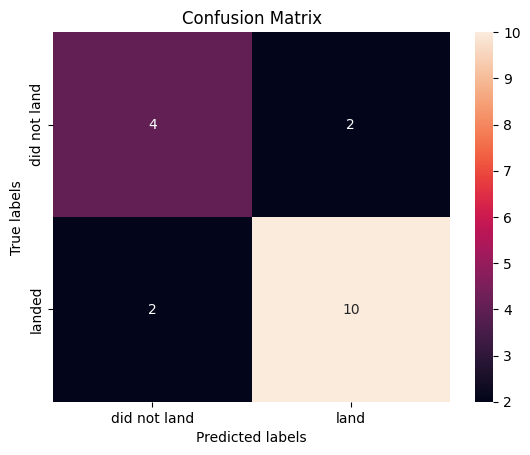

In [22]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define parameters for GridSearchCV
parameters = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create GridSearchCV object with SVM and parameters
svm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)

# Fit GridSearchCV to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", svm_cv.best_params_)
print("Best Score:", svm_cv.best_score_)

Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Score: 0.8178571428571428


In [26]:
print('done')

done


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [27]:
accuracy = svm_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8888888888888888


We can plot the confusion matrix


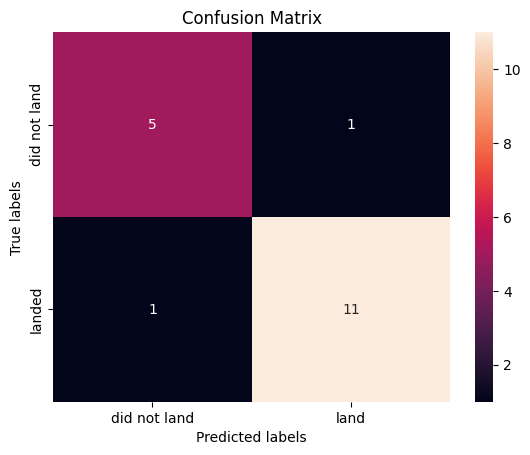

In [28]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [30]:
# parameters = {'criterion': ['gini', 'entropy'],
#      'splitter': ['best', 'random'],
#      'max_depth': [2*n for n in range(1,10)],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10]}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

# Define parameters for GridSearchCV
parameters = {
    'tree__criterion': ['gini', 'entropy'],  # Split criterion
    'tree__max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__splitter': ['best', 'random'],
    'tree__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create GridSearchCV object with DecisionTreeClassifier and parameters
tree_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)

# Fit GridSearchCV to find the best parameters
tree_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", tree_cv.best_params_)
print("Best Score:", tree_cv.best_score_)

tree = DecisionTreeClassifier()

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 5, 'tree__splitter': 'random'}
Best Score: 0.8446428571428571


In [31]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 5, 'tree__splitter': 'random'}
accuracy : 0.8446428571428571


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [32]:
accuracy = tree_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7222222222222222


We can plot the confusion matrix


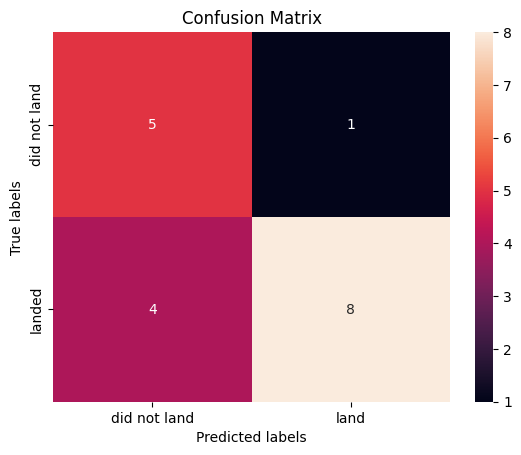

In [33]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [34]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameters for GridSearchCV
parameters = {
    'knn__n_neighbors': [3, 5, 7],  # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__p': [1,2],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Create GridSearchCV object with KNeighborsClassifier and parameters
knn_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)

# Fit GridSearchCV to find the best parameters
knn_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Best Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}
Best Score: 0.7910714285714284


In [35]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}
accuracy : 0.7910714285714284


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [36]:
accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8888888888888888


We can plot the confusion matrix


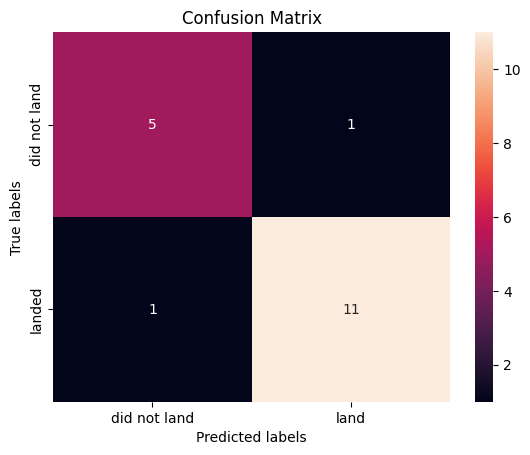

In [37]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [38]:
accuracy_knn = knn_cv.score(X_test, Y_test)
accuracy_tree = tree_cv.score(X_test, Y_test)
accuracy_svm = svm_cv.score(X_test, Y_test)

# Print the accuracies
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy of Decision Tree:", accuracy_tree)
print("Accuracy of SVM:", accuracy_svm)

# Determine which model performs best
best_accuracy = max(accuracy_knn, accuracy_tree, accuracy_svm)
best_model = None

if best_accuracy == accuracy_knn:
    best_model = "KNN"
elif best_accuracy == accuracy_tree:
    best_model = "Decision Tree"
else:
    best_model = "SVM"

print(f"The best performing model is: {best_model} with accuracy {best_accuracy}")

Accuracy of KNN: 0.8888888888888888
Accuracy of Decision Tree: 0.7222222222222222
Accuracy of SVM: 0.8888888888888888
The best performing model is: KNN with accuracy 0.8888888888888888


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
